In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.cross_validation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
#because dataset is skewed we can try out logistic regression with balanced weights
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.cross_validation import train_test_split

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    # available from https://s3.amazonaws.com/datarobotblog/notebooks/sklearn_backports.py
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

# ignore DeprecateWarnings by sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import SciKit Learn functions
from sklearn.metrics import roc_curve, auc , roc_auc_score, confusion_matrix, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import grid_search
from sklearn import tree

In [4]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_train.SeriousDlqin2yrs))
    plt.xticks(tick_marks, df_train.SeriousDlqin2yrs, rotation=45)
    plt.yticks(tick_marks, df_train.SeriousDlqin2yrs)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
df_train=pd.read_csv('train_ireg_amd_dmd.csv')
df_test=pd.read_csv('test_ireg_amd_dmd.csv')

In [7]:
df_train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
5,5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0
6,6,0,0.305682,57,0,5710.000000,8738.957438,8,0,3,0,0.0
7,7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0
8,8,0,0.116951,27,0,46.000000,3045.627787,2,0,0,0,1.0
9,9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0


In [8]:
#Currently getting subset of data and just wrangling around and trying

Y_train=np.array(df_train.SeriousDlqin2yrs)
#features = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
#            'MonthlyIncome', 'age', 'NumberOfTimes90DaysLate']
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_train=np.array(df_train[features])

In [9]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25)

In [ ]:
parameters = { 
    #these are depths
    'n_estimators': [2000,3000,3500,4000],
    'max_features':['auto','sqrt','log2']
    }

clftree = grid_search.GridSearchCV(RandomForestClassifier(criterion='gini', oob_score=True,class_weight='auto',n_jobs=-1), parameters, n_jobs=-1,
                                  scoring='roc_auc',refit=True)

clftree.fit(X_train, Y_train)
tree_model = clftree.best_estimator_
print (clftree.best_score_, clftree.best_params_)

(0.84356211377082768, {'max_features': 'log2', 'n_estimators': 2000})


In [22]:
print "best ",clftree.best_estimator_
tree_model.fit(X_train,Y_train)
prob=tree_model.predict_proba(X_validation)
auc_score=roc_auc_score(Y_validation,prob[:,1])
print "ROC score on model with depth  ",roc_auc_score(Y_validation,prob[:,1])



best  RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
ROC score on model with depth   0.847941505769


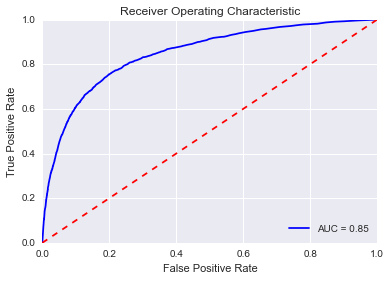

In [23]:
preds = prob[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

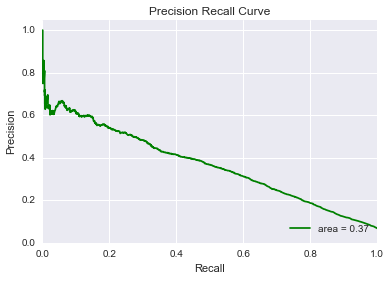

interpretation remaining


In [25]:
precision, recall, _ = precision_recall_curve(Y_validation, preds, pos_label=1)
average_precision = average_precision_score(Y_validation, preds)
plt.plot(recall, precision, label='area = %0.2f' % average_precision, color="green")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")
plt.show()

print "interpretation remaining"

In [27]:
# lets use best model to learn whole model
X_train_final=np.array(df_train[features])
Y_train_final=np.array(df_train.SeriousDlqin2yrs)
#print X_train_final

model = RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

finalmodel=model.fit(X_train_final,Y_train_final)
features=['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
X_test=np.array(df_test[features])

pred_test=finalmodel.predict_proba(X_test)[:,1]

In [28]:
idx=np.arange(1,len(pred_test)+1,1)
print len(pred_test)

#output=np.array()
#output=np.zeros((len(pred_test),2))
#output[:,0]=idx
#output[:,1]=pred_test
output=pd.DataFrame(pred_test)
dfoutput=pd.DataFrame(output)
dfoutput['Id']=idx
dfoutput['Probability']=dfoutput[0]
del dfoutput[0]
dfoutput

101503


,Id,Probability
0,1,0.029500
1,2,0.041500
2,3,0.003000
3,4,0.021500
4,5,0.154500
5,6,0.025000
6,7,0.058000
7,8,0.101000
8,9,0.007500
9,10,0.311465


In [29]:
dfoutput.to_csv('pred_randomforest.csv',index=False)